In [1]:
import torch
import matplotlib.pyplot as plt
from DJSCC import *
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from torchvision import transforms
import kaijsra
import torch.nn as nn
import torchsummary
import pickle
import numpy as np
import os
from functions import Imageset
from compressai.ops import compute_padding
from pytorch_msssim import ms_ssim

KeyboardInterrupt: 

Best test PSNR performance:  31.09479138558839
Number of epochs trained:  30
The best model epoch:  27


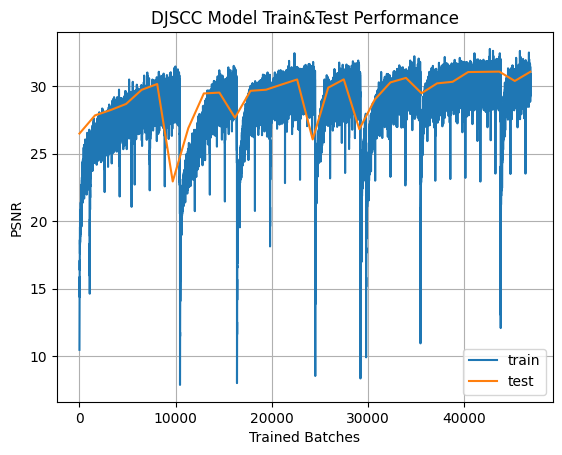

In [7]:
with open('./savedmodels/history_10_bwratio_0.095_2024_01_21_17_02_43.txt','rb') as f:
    res = pickle.load(f)
lentest = len(res['test'])
lentrain = len(res['train'])
xtest = np.linspace(0, lentrain, lentest)
plt.plot(res['train'],label='train')
plt.plot(xtest,res['test'],label='test')
plt.legend()
plt.xlabel('Trained Batches')
plt.ylabel("PSNR")
plt.title("DJSCC Model Train&Test Performance")
plt.grid('on')
# plt.text(30000,17,'Bandwidth Ratio=1/6\nTraining SNR=10dB')
print("Best test PSNR performance: ", max(res['test']))
print("Number of epochs trained: ", len(res['test']))
print("The best model epoch: ", np.argmax(res['test']))

In [8]:
dev='cuda:6'
with open('./savedmodels/model_snrdb_10_bwr_0.020_2024_01_21_16_36_54.pth.tar','rb') as f:
    model0=pickle.load(f)
model = Autoencoder(torch.inf,0.02,(3,256,256))
model.load_state_dict(model0.state_dict())
model = model.to(dev)
dset = Imageset('../compress_lip/Jianhao_datasets/CLIC/',lambda x:x,1,1)
msels = []
model.eval()
with torch.no_grad():
    for x in tqdm.tqdm(dset):
        x=x.unsqueeze(0).to(dev)
        h,w=x.size(2),x.size(3)
        pad,unpad=compute_padding(h,w,min_div=2**6)
        x_padded = F.pad(x,pad,mode='constant',value=0)
        outenc = model.encoder(x_padded)
        # xhat = model(x_padded)
        # print(xhat.shape)
        # x_unpad = F.pad(xhat,unpad)
        # print(x_unpad.shape)
        # mse = torch.mean((x-x_unpad)**2)
        # print('max x: ', torch.max(x).item())
        # print('min x: ', torch.min(x).item())
        # ssim=ms_ssim(x, x_unpad, data_range=1.).item()
        # print('ssim:', ssim)
        # print(mse)
        # print('psnr: ', 10*torch.log10(1/mse))
        # msels.append(mse.item())
        # print(msels)
        break
    print("done")
print("Done")

Number of feature map:  2


  0%|          | 0/10 [00:00<?, ?it/s]

done
Done


In [3]:
import pprint
import pandas as pd
p = pprint.PrettyPrinter(indent=4)
with open('./evalresults/CLIC_evalres_2024_01_22_21_45_46.pkl','rb') as f:
    res = pickle.load(f)
p.pprint(res)
# for k, v in res.items():
#     if not k.startswith('model'):
#         continue
#     modelres = v
#     df = pd.DataFrame(modelres,index=res['test_snrdbs'])
#     df.to_excel(k+'df.xlsx')

{   'channel': 10,
    'dataset': 'CLIC',
    'model_snrdb_10_bwr_0.020_2024_01_21_16_36_54.pth.tar': defaultdict(<class 'list'>,
                                                                        {   'mse': [   0.011848405068740249,
                                                                                       0.0045516787611995825,
                                                                                       0.0025633002823451535,
                                                                                       0.0017043069567686568,
                                                                                       0.001572362217460371],
                                                                            'psnr': [   19.263401067394206,
                                                                                        23.41828396253007,
                                                                                        25.912005146403352

In [5]:
with open('./savedmodels/model_snrdb_10_bwr_0.095_2024_01_21_14_41_27.pth.tar','rb') as f:
    model0=pickle.load(f)
model0.bwr

0.095